In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import nltk  
from wordcloud import WordCloud
from konlpy.tag import Okt

from collections import Counter

import datetime

In [2]:
# 데이터 불러오기
train_app = pd.read_csv('리브온_Appstore.csv')
train_play = pd.read_csv('리브온_Playstore.csv')

In [3]:
# 데이터 합치기
train = pd.concat([train_app, train_play], axis=0)

In [4]:
# 데이터 날짜순 정렬
train = train.sort_values(by = 'date', ascending = False)
train = train.reset_index()
del train['index']

In [5]:
# 2019-01-01 이후 리뷰만 보기
train = train[pd.to_datetime(train['date']) >= pd.to_datetime('2019-01-01')]

In [6]:
print(train.shape)
train.head()

(280, 4)


,date,ratings,helpful,comment
0,2020-11-15,4,0,시세 산출 방식은 어찌 되는건가요? 하한가 일반 상한으로 계산 되던데 상세히 설명 ...
1,2020-11-13,2,0,다운만 계속..
2,2020-11-09,3,0,아이폰인데 안되요... \n뭔 처음만 들어가지고..\niOS13.5.1
3,2020-11-09,4,0,굿
4,2020-11-08,5,4,"매매,전세,월세 가격이 표시되면 훨씬더 좋을것같습니다~~"


In [7]:
# 1, 2, 3 점 --> 부정적 
# 4, 5 점    --> 긍정적
train_good = train[train['ratings'] >= 4]
train_bad = train[train['ratings'] < 4]

In [8]:
# 리뷰에서 명사를 뽑아 새 컬럼 생성
twit = Okt()

train_good['Noun'] = train_good['comment'].apply(twit.nouns) # only 명사

train_bad['Noun'] = train_bad['comment'].apply(twit.nouns) # only 명사

C:\Users\id272\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\id272\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 긍정적인 리뷰의 단어 빈도 수

In [9]:
noun_text_good = [j for i in train_good['Noun'] for j in i]
text_good = nltk.Text(noun_text_good, name='NMSC')
count_good = Counter(text_good.vocab())
han_tags_good = Counter.most_common(count_good)

# 단어 길이가 1인 단어는 제외
wordInfo = dict()
for tags, counts in han_tags_good:
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

han_tags_good = Counter.most_common(wordInfo)

부동산 : 14
정보 : 14
매물 : 12
어플 : 10
시세 : 8
보기 : 7
사용 : 5
단지 : 5
리브 : 5
가격 : 4


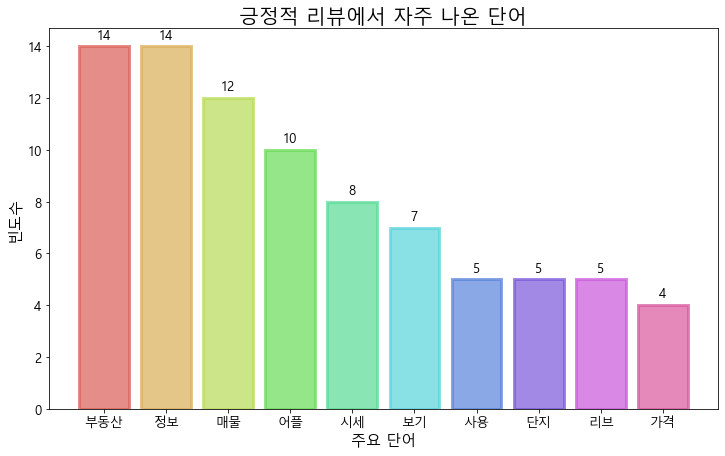

In [16]:
# 빈도 상위 10개 시각화
for i in han_tags_good[:10]:
    print(i[0],':', i[1])

word_list = list(dict(han_tags_good).keys())[:10]
num_list = list(dict(han_tags_good).values())[:10]

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot() ## Axes 추가
colors = sns.color_palette('hls',len(word_list)) ## 색상 지정

xtick_label_position = list(range(len(word_list))) ## x축 눈금 라벨이 표시될 x좌표

plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, word_list, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, num_list,
               color=colors, edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.3,
            num_list[i],ha='center',fontsize=13)

plt.title('긍정적 리뷰에서 자주 나온 단어',fontsize=20) ## 타이틀 출력
plt.xlabel('주요 단어',fontsize=axis_label_size)
plt.ylabel('빈도수',fontsize=axis_label_size)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

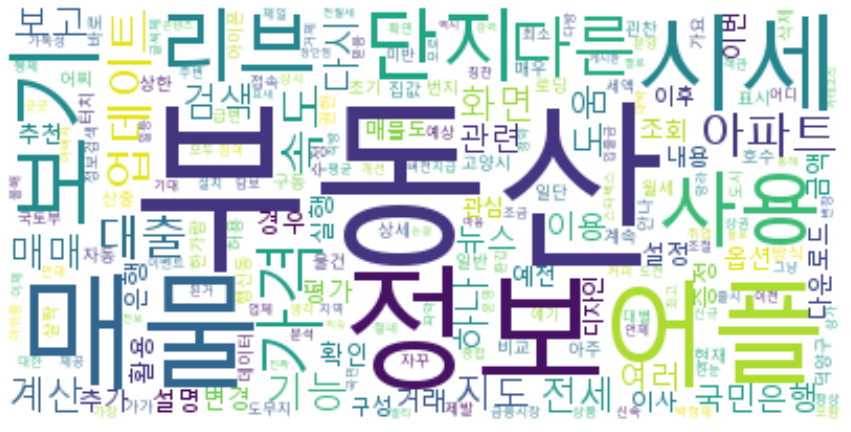

In [11]:
# 워드 클라우드

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\malgun.ttf',
               background_color = 'white').generate_from_frequencies(dict(han_tags_good))

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

## 부정적인 리뷰의 단어 빈도 수

In [12]:
noun_text_bad = [j for i in train_bad['Noun'] for j in i]
text_bad = nltk.Text(noun_text_bad, name='NMSC')
count_bad = Counter(text_bad.vocab())
han_tags_bad = Counter.most_common(count_bad)

# 단어 길이가 1인 단어는 제외
wordInfo = dict()
for tags, counts in han_tags_bad:
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

han_tags_bad = Counter.most_common(wordInfo)

실행 : 27
어플 : 27
화면 : 24
아이폰 : 20
업데이트 : 19
매물 : 19
사용 : 19
시세 : 19
계속 : 18
검색 : 16


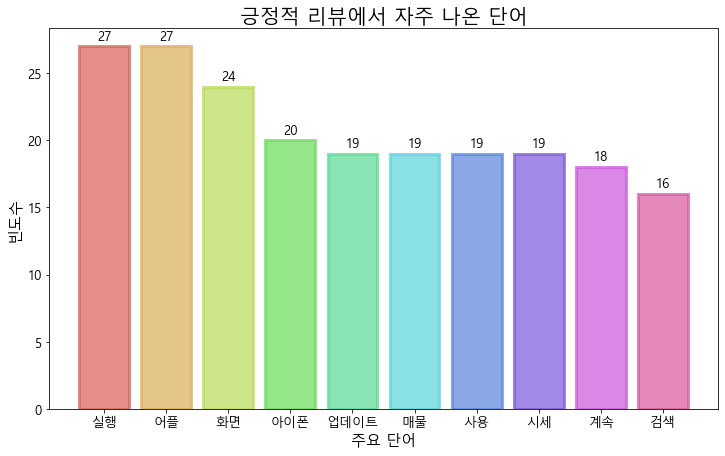

In [13]:
# 빈도 상위 10개 시각화
for i in han_tags_bad[:10]:
    print(i[0],':', i[1])

word_list = list(dict(han_tags_bad).keys())[:10]
num_list = list(dict(han_tags_bad).values())[:10]

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot() ## Axes 추가
colors = sns.color_palette('hls',len(word_list)) ## 색상 지정

xtick_label_position = list(range(len(word_list))) ## x축 눈금 라벨이 표시될 x좌표

plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, word_list, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, num_list,
               color=colors, edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.5,
            num_list[i],ha='center',fontsize=13)

plt.title('긍정적 리뷰에서 자주 나온 단어',fontsize=20) ## 타이틀 출력
plt.xlabel('주요 단어',fontsize=axis_label_size)
plt.ylabel('빈도수',fontsize=axis_label_size)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

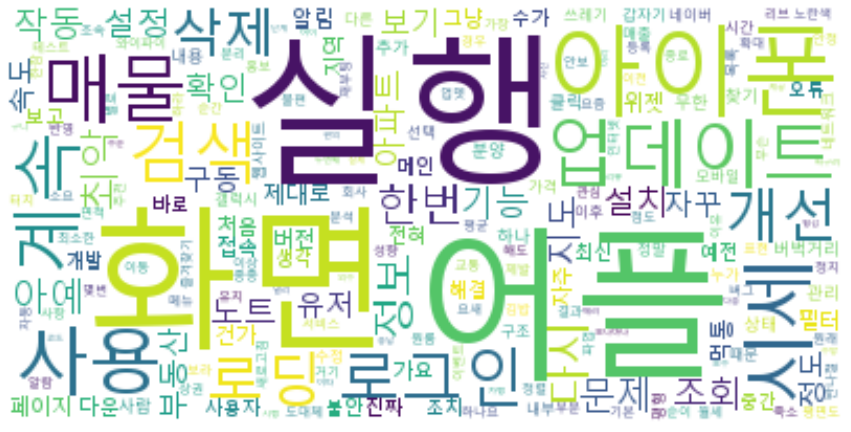

In [14]:
# 워드 클라우드

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\malgun.ttf',
               background_color = 'white').generate_from_frequencies(dict(han_tags_bad))

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')